In [1]:
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [0]:
train_targets

데이터 정규화 작업

In [0]:
mean=train_data.mean(axis=0)
train_data -= mean

std =train_data.std(axis=0)
train_data /= std

test_data -=mean
test_data /= std

In [0]:
from keras import models
from keras import layers

In [0]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [0]:
import numpy as np

k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

In [10]:
for i in range(k):
  print("처리중인 폴드 #",i)
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

  model=build_model()
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
  val_mse, val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0








처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [12]:
all_scores

[2.1193153409674617, 2.840757374716277, 2.62499471348111, 2.464834157193061]

In [0]:
num_epochs=500
all_mae_histories=[]

In [13]:
for i in range(k):
  print("처리중인 폴드 #",i)
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

  model=build_model()
  history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=1,verbose=0)
  mae_history=history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [0]:
avarage_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

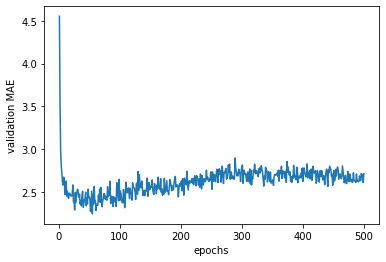

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(avarage_mae_history)+1),avarage_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation MAE')
plt.show()

In [0]:
def smooth_curve(points,factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

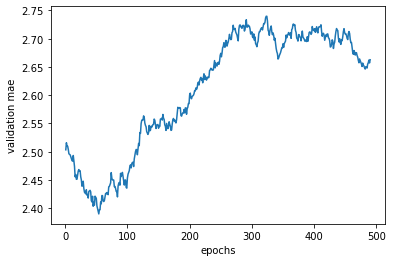

In [19]:
smooth_mae_history=smooth_curve(avarage_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

In [20]:
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 2ms/step


In [21]:
test_mae_score

3.0526829887838924